# Predicting Employee Attrition Using Machine Learning

##### Author : Lana Fuadi

# 0. Preparation

## 0.1. Import Required Library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Load Dataset

In [8]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

In [9]:
# Load dataset
data = pd.read_excel('employee.xlsx')
data.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
104,jumpyTomatoe4,105969,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Sangat_bagus,Jakarta Barat,Indeed,4,3.0,0.0,0.0,14.0,+6285778884xxx,jumpyTomatoe4555@gmail.com,Magister,1,0.0,toxic_culture,1991-01-28,2013-8-19,2020-1-14,2017-09-05
182,somberRelish9,106017,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Pusat,Indeed,2,4.0,0.0,0.0,10.0,+6289511334xxx,somberRelish9280@gmail.com,Sarjana,1,NaN,masih_bekerja,1976-01-19,2013-9-30,2020-1-23,-
264,mercifulCheetah9,106590,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Barat,LinkedIn,3,4.0,5.0,0.0,13.0,+6281883291xxx,mercifulCheetah9150@proton.com,Sarjana,1,NaN,NaN,1983-02-09,2016-6-30,2020-1-14,-


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

# 1. Exploratory Data Analysis

## 1.1. Handle Unimportant Columns

In [11]:
# Count number of unique class
uniques = data.nunique().sort_values(ascending = False)
uniques

EnterpriseID                          287
Email                                 287
NomorHP                               287
Username                              285
TanggalLahir                          284
TanggalPenilaianKaryawan              127
TanggalHiring                          97
TanggalResign                          53
JumlahKetidakhadiran                   22
Pekerjaan                              14
AlasanResign                           11
HiringPlatform                          9
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
PerformancePegawai                      5
SkorKepuasanPegawai                     5
SkorSurveyEngagement                    5
StatusPernikahan                        5
AsalDaerah                              5
JenjangKarir                            3
TingkatPendidikan                       3
StatusKepegawaian                       3
PernahBekerja                           2
IkutProgramLOP                    

In [12]:
# Drop unimportant columns; (Username, EnterpriseID, NomorHp, and Email).
# Drop PernahBekerja; it is unimportant since it only has one value.
# Drop IkutProgramLOP column since it has too many missing values, 258 out of 287

data = data.drop(['Username', 'EnterpriseID', 'NomorHP', 'Email', 'PernahBekerja', 'IkutProgramLOP'], axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 282 non-null    float64
 10  JumlahKeikutsertaanProjek           284 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  286 non-n

## 1.2. Handle Missing Value

In [14]:
# Calculate missing values before handling them
print('There are', data.isnull().sum().sum(), 'missing values to handle')

There are 81 missing values to handle


In [15]:
# Filter columns with missing values
missing = data.columns[data.isna().any()]

# Calculate the count of missing values in each column
missing_counts = data[missing].isna().sum()

# Sort the result by descending count
missing_counts.sort_values(ascending=False)

AlasanResign                          66
JumlahKetidakhadiran                   6
SkorKepuasanPegawai                    5
JumlahKeikutsertaanProjek              3
JumlahKeterlambatanSebulanTerakhir     1
dtype: int64

In [16]:
data[['JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir']].describe().T

,count,mean,std,min,25%,50%,75%,max
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0


* we will use mode to do imputation to AlasanResign, JumlahKetidakhadiran, SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir columns.
* There are two reason for this, first is because AlasanResign values are string which has no mean attribute. second is because the rest's mean values have decimal other than zero, if we do mean imputation we will add more unnecessary unique values.

In [17]:
# Columns with missing values
columns_to_impute = ['AlasanResign', 'JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir']

# Perform mode imputation for each column
for column in columns_to_impute:
    data[column].fillna(data[column].mode().iloc[0], inplace=True)

In [18]:
# Calculate missing values before handling them
print('There are', data.isnull().sum().sum(), 'missing values in the dataset')

There are 0 missing values in the dataset


## 1.3. Handle Duplicate Values

In [19]:
# Calculate duplicate values to handle
print('There are', data.duplicated().sum(), 'duplicate values to handle')

There are 0 duplicate values to handle


## 1.4. Handle Missmatch Data types

In [20]:
# Check the types of all features
data.dtypes

StatusPernikahan                       object
JenisKelamin                           object
StatusKepegawaian                      object
Pekerjaan                              object
JenjangKarir                           object
PerformancePegawai                     object
AsalDaerah                             object
HiringPlatform                         object
SkorSurveyEngagement                    int64
SkorKepuasanPegawai                   float64
JumlahKeikutsertaanProjek             float64
JumlahKeterlambatanSebulanTerakhir    float64
JumlahKetidakhadiran                  float64
TingkatPendidikan                      object
AlasanResign                           object
TanggalLahir                           object
TanggalHiring                          object
TanggalPenilaianKaryawan               object
TanggalResign                          object
dtype: object

In [21]:
# Replace "-" with NaN in Tanggalresign
data['TanggalResign'] = data['TanggalResign'].replace('-', np.nan)

# Convert TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, and TanggalResign column to datetime
data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])
data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])
data['TanggalPenilaianKaryawan'] = pd.to_datetime(data['TanggalPenilaianKaryawan'])
data['TanggalResign'] = pd.to_datetime(data['TanggalResign'])

In [22]:
data.dtypes

StatusPernikahan                              object
JenisKelamin                                  object
StatusKepegawaian                             object
Pekerjaan                                     object
JenjangKarir                                  object
PerformancePegawai                            object
AsalDaerah                                    object
HiringPlatform                                object
SkorSurveyEngagement                           int64
SkorKepuasanPegawai                          float64
JumlahKeikutsertaanProjek                    float64
JumlahKeterlambatanSebulanTerakhir           float64
JumlahKetidakhadiran                         float64
TingkatPendidikan                             object
AlasanResign                                  object
TanggalLahir                          datetime64[ns]
TanggalHiring                         datetime64[ns]
TanggalPenilaianKaryawan              datetime64[ns]
TanggalResign                         datetime

## 1.5. Visualization and Statistical Analysis

In [24]:
# Extract the year from the hiring and resign dates
data['YearHired'] = data['TanggalHiring'].dt.year
data['YearResigned'] = data['TanggalResign'].dt.year

# Calculate the number of employees hired per year
hired_per_year = data['YearHired'].value_counts().sort_index().reset_index()
hired_per_year.columns = ['Year', 'EmployeesHired']
hired_per_year['Year'] = hired_per_year['Year'].astype(int)

# Calculate the number of employees resigned per year
resigned_per_year = data['YearResigned'].value_counts().sort_index().reset_index()
resigned_per_year.columns = ['Year', 'EmployeesResigned']
resigned_per_year['Year'] = resigned_per_year['Year'].astype(int)

# Merge the two aggregate tables based on the "Year" column
merged_table = hired_per_year.merge(resigned_per_year, on='Year', how='outer')

# Fill missing values with 0 in the merged table
merged_table = merged_table.fillna(0)

# Calculate the number of stayed employees
merged_table['EmployeesStayed'] = merged_table['EmployeesHired'].cumsum() - merged_table['EmployeesResigned']

# Calculate the change in employee count every year
merged_table['EmployeeCountChange'] = merged_table['EmployeesHired'] - merged_table['EmployeesResigned'].shift(fill_value=0)

# Convert "EmployeesHired", "EmployeesResigned", "EmployeesStayed" and "EmployeeCountChange" columns to integers
merged_table['EmployeesHired'] = merged_table['EmployeesHired'].astype(int)
merged_table['EmployeesResigned'] = merged_table['EmployeesResigned'].astype(int)
merged_table['EmployeesStayed'] = merged_table['EmployeesStayed'].astype(int)
merged_table['EmployeeCountChange'] = merged_table['EmployeeCountChange'].astype(int)

# Calculate the total number of resigned employees
total_hired = merged_table['EmployeesHired'].sum()
total_resigned = merged_table['EmployeesResigned'].sum()
total_stayed = merged_table['EmployeesStayed'].iloc[-1]
total_change = merged_table['EmployeeCountChange'].sum()

# Print the merged table
print("Merged Employee Statistics per Year:")
print(merged_table)

# Print the total number of resigned employees
print("Total Hired Employees:", total_hired)
print("Total Resigned Employees:", total_resigned)
print("Total Stayed Employees:", total_stayed)
print("Total Change Employees:", total_change)

Merged Employee Statistics per Year:
    Year  EmployeesHired  EmployeesResigned  EmployeesStayed   
0   2006               1                  0                1  \
1   2007               2                  0                3   
2   2008               2                  0                5   
3   2009               7                  0               12   
4   2010               8                  0               20   
5   2011              76                  0               96   
6   2012              41                  0              137   
7   2013              43                  5              175   
8   2014              56                 12              224   
9   2015              31                  8              259   
10  2016              14                  8              273   
11  2017               5                 19              267   
12  2018               1                 26              261   
13  2019               0                  5              282   
14 

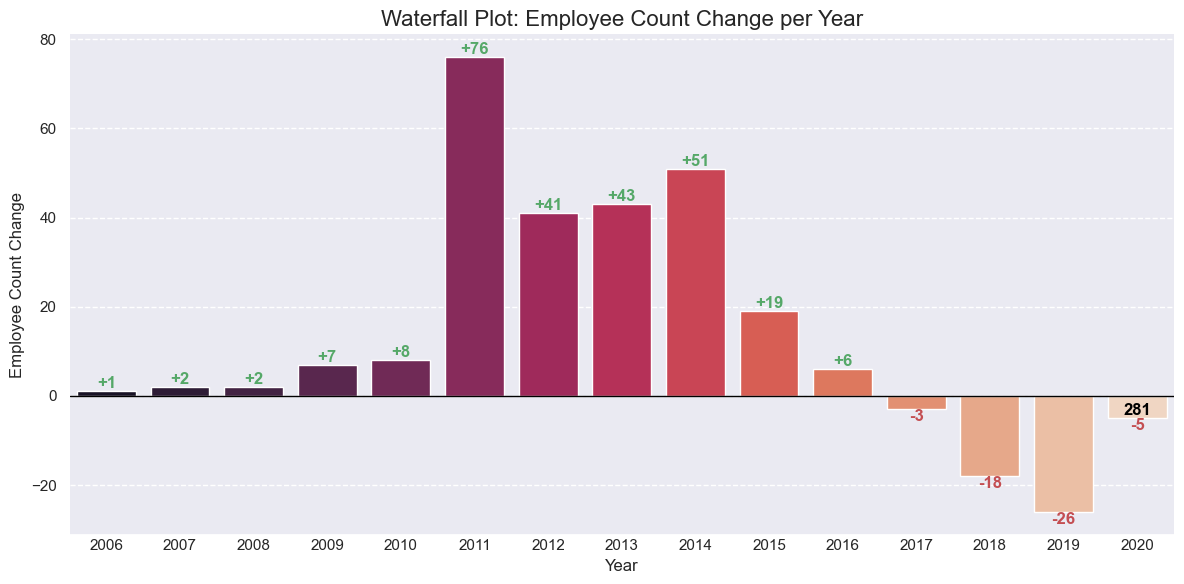

In [25]:
# Calculate the most recent count of employees who have stayed
most_recent_stayed = merged_table['EmployeesStayed'].iloc[-1]

# Set up the waterfall plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

# Plot the waterfall chart
waterfall = sns.barplot(x=merged_table['Year'], y=merged_table['EmployeeCountChange'], palette="rocket")

# Add labels to the bars
for i, value in enumerate(merged_table['EmployeeCountChange']):
    if value > 0:
        waterfall.text(i, value, f'+{value}', ha='center', va='bottom', color='g', fontweight='bold')
    else:
        waterfall.text(i, value, value, ha='center', va='top', color='r', fontweight='bold')

# Add a vertical line at zero
waterfall.axhline(0, color='black', linestyle='-', linewidth=1)

# Add a title and labels
waterfall.set_title('Waterfall Plot: Employee Count Change per Year', fontsize=16)
waterfall.set_xlabel('Year', fontsize=12)
waterfall.set_ylabel('Employee Count Change', fontsize=12)

# Remove the spines
waterfall.spines['right'].set_visible(False)
waterfall.spines['top'].set_visible(False)
waterfall.spines['left'].set_visible(False)

# Customize the ticks and grid
waterfall.tick_params(axis='x', length=0)
waterfall.grid(axis='y', linestyle='--')

# Display the most recent count of employees who have stayed
waterfall.text(len(merged_table)-1, merged_table['EmployeeCountChange'].iloc[-1], most_recent_stayed,
               ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


In [26]:
data[['AlasanResign']].value_counts()

AlasanResign            
masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
Product Design (UI & UX)      4
internal_conflict             4
apresiasi                     2
Name: count, dtype: int64

In [27]:
data.to_excel('C:/Users/lanafuadi/Downloads/cleaned.xlsx', index=False)